QUESTION 1

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [84]:
def generate_data(n_samples, centers, random_state):
    return make_blobs(n_samples=n_samples, centers=centers, random_state=random_state)

def perform_agglomerative_clustering(data, n_clusters, linkage):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    labels = cluster.fit_predict(data)
    return labels

def plot_clusters(data, labels, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.title(title)



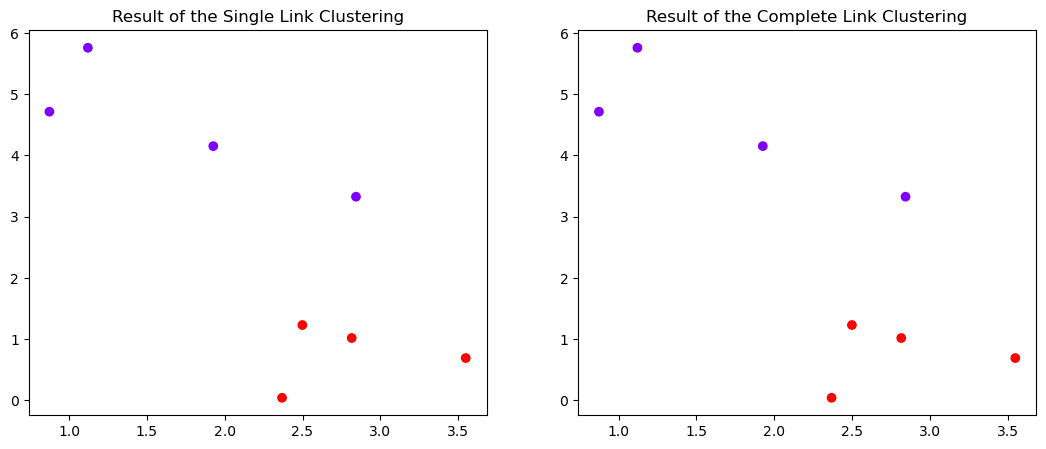

In [85]:
if __name__ == "__main__":
    no_samples = 8
    centrs = 2
    random_state = 0

    data_pts, ground_truth_labels = generate_data(no_samples, centrs, random_state)
    single_link_lbls = perform_agglomerative_clustering(data_pts, centrs, 'single')
    complete_link_lbls = perform_agglomerative_clustering(data_pts, centrs, 'complete')

    # Plotting
    plt.figure(figsize=(13, 5))

    plt.subplot(121)
    plot_clusters(data_pts, single_link_lbls, 'Result of the Single Link Clustering')

    plt.subplot(122)
    plot_clusters(data_pts, complete_link_lbls, 'Result of the Complete Link Clustering')

    plt.show()


QUESTION 2

In [86]:
def load_data(file_path):
    return np.loadtxt(file_path, delimiter=" ")

def perform_kmeans_clustering(data, initial_centroids, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1, random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    return labels

def plot_clustering_results(data, labels, initial_centroids, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels)
    plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker="X", s=200, c="red", label="Centroids")
    plt.title(title)
    plt.legend()
    plt.show()



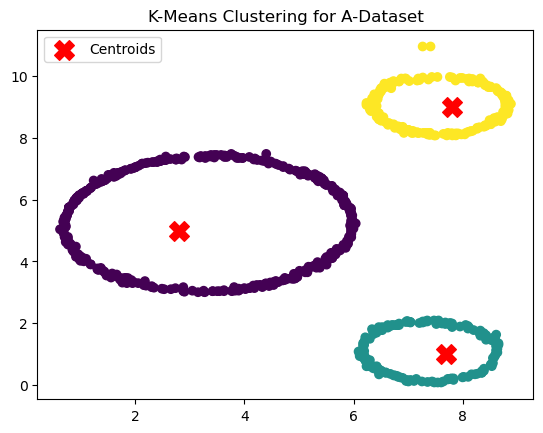

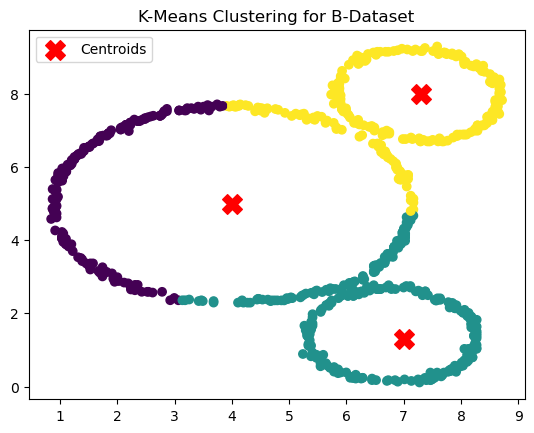

In [87]:
if __name__ == "__main__":
    datasetA_path = "/Users/admin/Documents/datasetA.txt"
    datasetB_path = "/Users/admin/Documents/datasetB.txt"

    datasetForA = load_data(datasetA_path)
    datasetForB = load_data(datasetB_path)

    initial_centroids_forDatasetA = np.array([[2.8, 5], [7.7, 1], [7.8, 9]])
    initial_centroids_forDatasetB = np.array([[4, 5], [7, 1.3], [7.3, 8]])

    labels_datasetA = perform_kmeans_clustering(datasetForA, initial_centroids_forDatasetA)
    labels_datasetB = perform_kmeans_clustering(datasetForB, initial_centroids_forDatasetB)

    plot_clustering_results(datasetForA, labels_datasetA, initial_centroids_forDatasetA, "K-Means Clustering for A-Dataset")
    plot_clustering_results(datasetForB, labels_datasetB, initial_centroids_forDatasetB, "K-Means Clustering for B-Dataset")


In conclusion, k-means is based on the assumption of spherical clusters and may not perform well 
on datasets with complex or non-spherical cluster forms, hence it is not guaranteed to discover the 
"right" clusters, even with the correct beginning centroids.

QUESTION 3

In [88]:
def kmeans_with_empty_cluster_handling(data_pts, no_clusters_k, initial_centroids):
    kmeans_instance = KMeans(n_clusters=no_clusters_k, init=initial_centroids, n_init=1, random_state=0)
    kmeans_instance.fit(data_pts)

    labels = kmeans_instance.labels_
    centroids = kmeans_instance.cluster_centers_

    for i in range(no_clusters_k):
        if i not in labels:
            max_distance = -1
            farthest_point = None
            for j, point in enumerate(data_pts):
                distance = np.linalg.norm(point - centroids[labels[j]])
                if distance > max_distance:
                    max_distance = distance
                    farthest_point = j
            labels[farthest_point] = i

    return labels, centroids



In [89]:
def plot_clusters(data_pts, labels, centroids, no_clusters_k):
    for i in range(no_clusters_k):
        cluster_points = data_pts[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

    plt.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, c="red", label="Centroids")
    plt.title("K-Means Clustering with Handling Empty Clusters")
    plt.legend()
    plt.show()



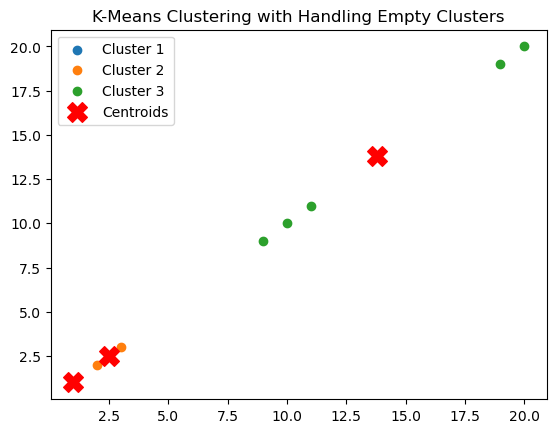

In [90]:
if __name__ == "__main__":
    data_pts = np.array([[1, 1], [2, 2], [3, 3], [9, 9], [10, 10], [11, 11], [19, 19], [20, 20]])
    no_clusters_k = 3
    initial_centroids = np.array([[1, 1], [2, 2], [3, 3]])

    labels, centroids = kmeans_with_empty_cluster_handling(data_pts, no_clusters_k, initial_centroids)
    plot_clusters(data_pts, labels, centroids, no_clusters_k)

When using K-Means clustering, if an empty cluster is found, you can re-initialize its centroid either
randomly or by selecting a data point that is farthest away from the current centroids.


QUESTION 4

In [91]:
def load_data(file_path):
    return np.loadtxt(file_path, delimiter=' ', skiprows=1)

def perform_kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    return labels, centers

def plot_clusters(data, labels, centers, title):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='black')
    plt.title(title)

/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/admin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


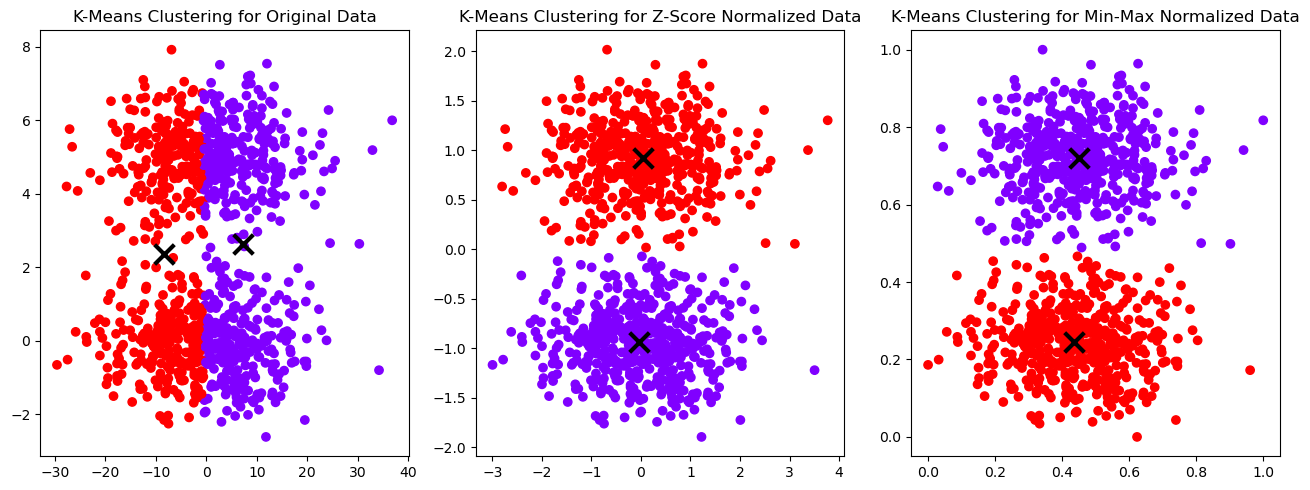

In [92]:
if __name__ == "__main__":
    data_file_path = '/Users/admin/Documents/qn4data.txt'
    data_pts = load_data(data_file_path)
    no_clusters_k = 2

    lbls_original, centers_original = perform_kmeans_clustering(data_pts, no_clusters_k)
    plt.figure(figsize=(13, 5))
    plt.subplot(131)
    plot_clusters(data_pts, lbls_original, centers_original, 'K-Means Clustering for Original Data')

    scalerZscore = StandardScaler()
    dataZscore = scalerZscore.fit_transform(data_pts)
    labelsZscore, centersZscore = perform_kmeans_clustering(dataZscore, no_clusters_k)
    plt.subplot(132)
    plot_clusters(dataZscore, labelsZscore, centersZscore, 'K-Means Clustering for Z-Score Normalized Data')

    scalerMinmaxx = MinMaxScaler()
    dataMinmaxx = scalerMinmaxx.fit_transform(data_pts)
    labelsMinmaxx, centersMinmaxx = perform_kmeans_clustering(dataMinmaxx, no_clusters_k)
    plt.subplot(133)
    plot_clusters(dataMinmaxx, labelsMinmaxx, centersMinmaxx, 'K-Means Clustering for Min-Max Normalized Data')

    plt.tight_layout()
    plt.show()
    
#Here I am getting warnings because the txt file has tab space in it and I used single space as delimiter.